In [1]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [3]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('FeatureID_WeatherData.csv')
print(report.columns)
print(report.shape)
print(report.dtypes)

Index(['ASSET_ID', 'FEATURE_ID', 'SITE_CODE', 'Station',
       'Distance_between_Features'],
      dtype='object')
(19611, 5)
ASSET_ID                      object
FEATURE_ID                    object
SITE_CODE                      int64
Station                       object
Distance_between_Features    float64
dtype: object


In [4]:
report.head(5)

,ASSET_ID,FEATURE_ID,SITE_CODE,Station,Distance_between_Features
0,HWCW506116,7U94/105,37805417,Baldock,7505.288654
1,HWCW506129,7U171/240,37809258,Baldock,7771.559283
2,HWCW506130,7U615/30,37809297,Baldock,8116.583897
3,HWCW506534,5U1081/30,27900451,Baldock,6171.225864
4,HWCW506536,5U1082/20,27900911,Baldock,6141.231656


In [5]:
report.describe()

,SITE_CODE,Distance_between_Features
count,1.961100e+04,19611.000000
mean,2.545900e+07,6628.677122
std,1.386683e+07,3671.699764
min,4.800097e+06,3.269519
25%,1.240616e+07,3831.316784
50%,2.790941e+07,6342.204502
75%,3.781266e+07,8746.198393
max,9.991020e+07,17917.264470


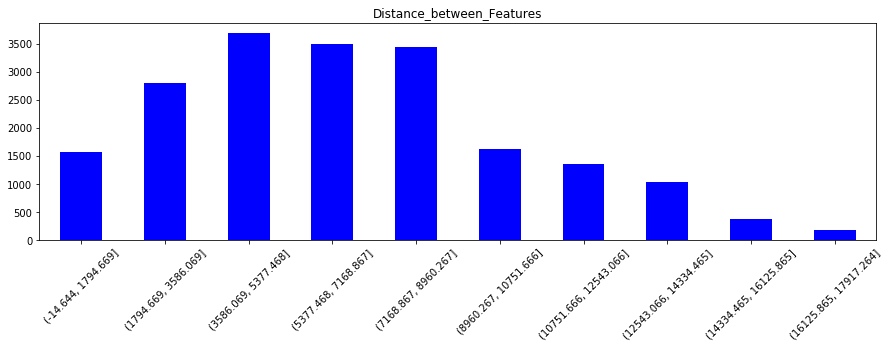

In [17]:
#Plot the average distance to the closest weather station
out, bins = pd.cut(report['Distance_between_Features'], bins=10, retbins = True)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
ax.set_title('Distance_between_Features')
ax.set_xticklabels(out.value_counts().reindex(out.cat.categories).index, rotation=45)
plt.show()


In [18]:
#Print the bin limits
bins

array([-1.46444764e+01,  1.79466901e+03,  3.58606851e+03,  5.37746800e+03,
        7.16886750e+03,  8.96026699e+03,  1.07516665e+04,  1.25430660e+04,
        1.43344655e+04,  1.61258650e+04,  1.79172645e+04])

In [9]:
out = pd.cut(report['Distance_between_Features'], bins=10)
out.value_counts().reindex(out.cat.categories)

(-14.644, 1794.669]       1581
(1794.669, 3586.069]      2810
(3586.069, 5377.468]      3691
(5377.468, 7168.867]      3500
(7168.867, 8960.267]      3449
(8960.267, 10751.666]     1623
(10751.666, 12543.066]    1361
(12543.066, 14334.465]    1043
(14334.465, 16125.865]     375
(16125.865, 17917.264]     178
Name: Distance_between_Features, dtype: int64

In [20]:
report['Station'].value_counts()

Stapleford               5175
High Cross               5093
Maylands                 3272
Baldock                  1922
Offley Road              1562
Bish Stortford Bypass    1093
Cow Roast                 752
Hay Street                571
Lilley                    171
Name: Station, dtype: int64